In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install -U keras-tuner


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Colab_data/CC_FRAUD.csv")


In [5]:
df


,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94677,XOSOP.COM,MO,685,11,11,0,0,0,1,1,0,1,3,0,8.112,15,1,49.95,49.95,LEGIT
94678,RONHGNCN.COM,KR,108,16,16,0,0,1,0,0,1,1,4,0,11.248,10,4,12.95,12.95,LEGIT
94679,XOSOP.COM,VO,601,18,18,0,0,1,1,1,0,1,2,0,27.824,23,0,38.85,38.85,LEGIT
94680,VUHZRNB.COM,LO,398,23,23,0,0,0,0,0,0,1,3,0,31.904,20,0,12.95,12.95,LEGIT


In [6]:
df.shape

(94682, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94682 entries, 0 to 94681
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DOMAIN         94682 non-null  object 
 1   STATE          94682 non-null  object 
 2   ZIPCODE        94682 non-null  int64  
 3   TIME1          94682 non-null  int64  
 4   TIME2          94682 non-null  int64  
 5   VIS1           94682 non-null  int64  
 6   VIS2           94682 non-null  int64  
 7   XRN1           94682 non-null  int64  
 8   XRN2           94682 non-null  int64  
 9   XRN3           94682 non-null  int64  
 10  XRN4           94682 non-null  int64  
 11  XRN5           94682 non-null  int64  
 12  VAR1           94682 non-null  int64  
 13  VAR2           94682 non-null  int64  
 14  VAR3           94682 non-null  float64
 15  VAR4           94682 non-null  int64  
 16  VAR5           94682 non-null  int64  
 17  TRN_AMT        94682 non-null  float64
 18  TOTAL_

In [8]:
df.isna().sum()

DOMAIN           0
STATE            0
ZIPCODE          0
TIME1            0
TIME2            0
VIS1             0
VIS2             0
XRN1             0
XRN2             0
XRN3             0
XRN4             0
XRN5             0
VAR1             0
VAR2             0
VAR3             0
VAR4             0
VAR5             0
TRN_AMT          0
TOTAL_TRN_AMT    0
TRN_TYPE         0
dtype: int64

In [9]:
df['TRN_TYPE'].value_counts()

LEGIT    92588
FRAUD     2094
Name: TRN_TYPE, dtype: int64

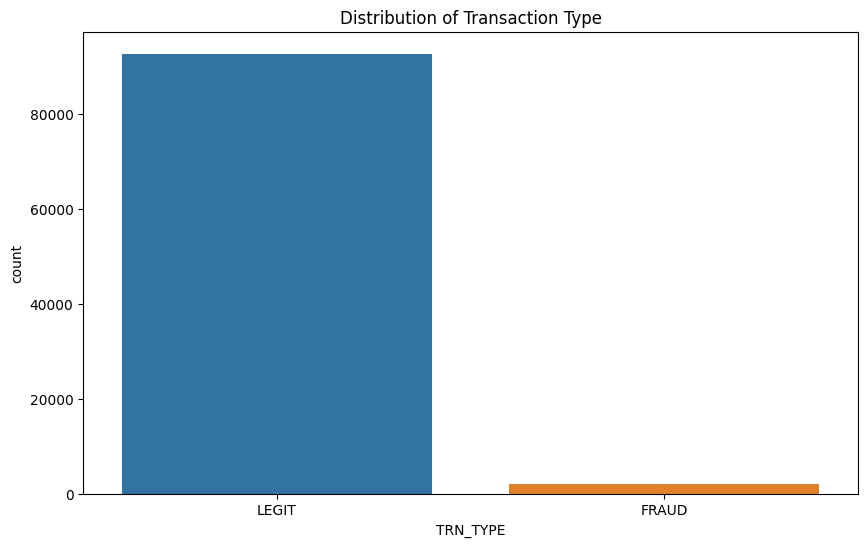

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TRN_TYPE')
plt.title('Distribution of Transaction Type')
plt.show()

In [11]:
data_summary = df.describe(include='all')
data_summary

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
count,94682,94682,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682.000000,94682
unique,9809,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,TMA.COM,KR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LEGIT
freq,16451,18676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92588
mean,NaN,NaN,454.379470,13.864726,13.875858,0.113306,0.018367,0.546989,0.541127,0.401185,0.019888,6.176676,2.419203,0.425561,5.716101,13.984115,1.375689,25.635312,25.626179,NaN
std,NaN,NaN,228.279524,5.263233,5.258338,0.316968,0.134274,0.497790,0.498308,0.490141,0.139615,102.977443,1.003760,0.494430,31.354601,6.516851,2.423941,14.190485,14.198761,NaN
min,NaN,NaN,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-258.120000,6.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,166.000000,10.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,-12.408000,8.000000,0.000000,12.950000,12.950000,NaN
50%,NaN,NaN,600.000000,14.000000,14.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,11.640000,12.000000,0.000000,25.900000,25.900000,NaN
75%,NaN,NaN,655.000000,18.000000,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,28.784000,19.000000,2.000000,38.850000,38.850000,NaN


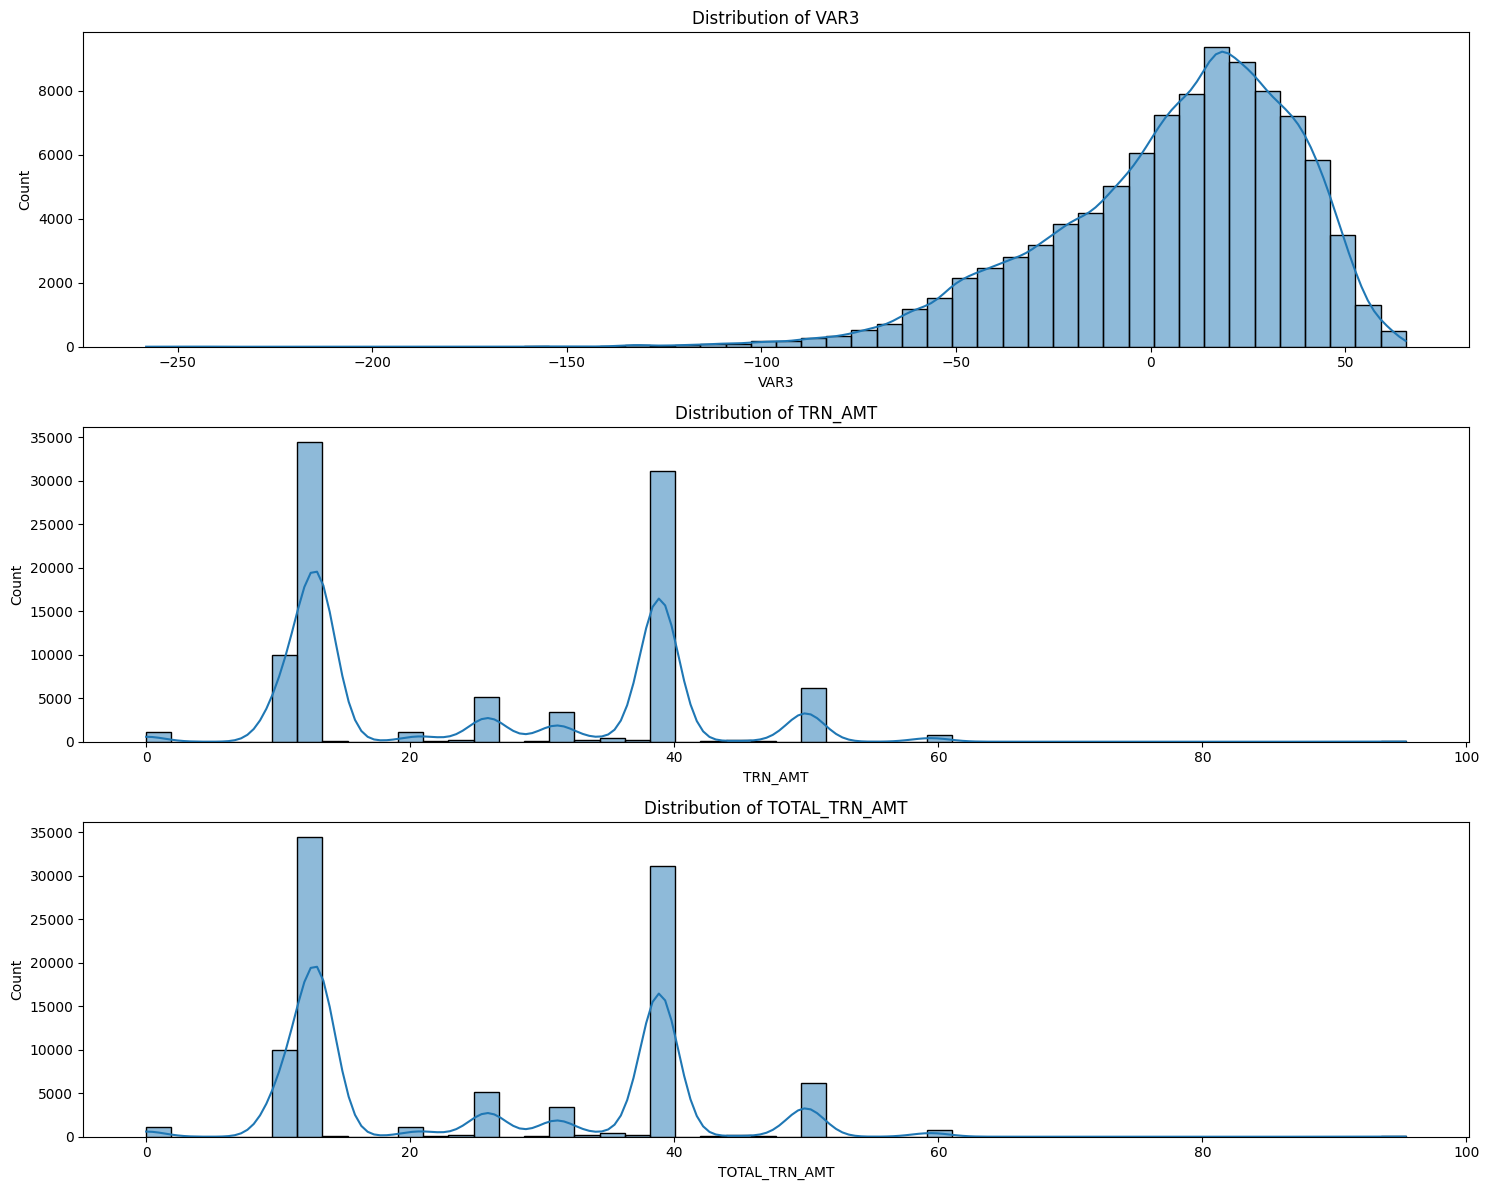

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))
sns.histplot(df['VAR3'], kde=True, ax=axes[0], bins=50)
axes[0].set_title('Distribution of VAR3')
sns.histplot(df['TRN_AMT'], kde=True, ax=axes[1], bins=50)
axes[1].set_title('Distribution of TRN_AMT')
sns.histplot(df['TOTAL_TRN_AMT'], kde=True, ax=axes[2], bins=50)
axes[2].set_title('Distribution of TOTAL_TRN_AMT')
plt.tight_layout()
plt.show()

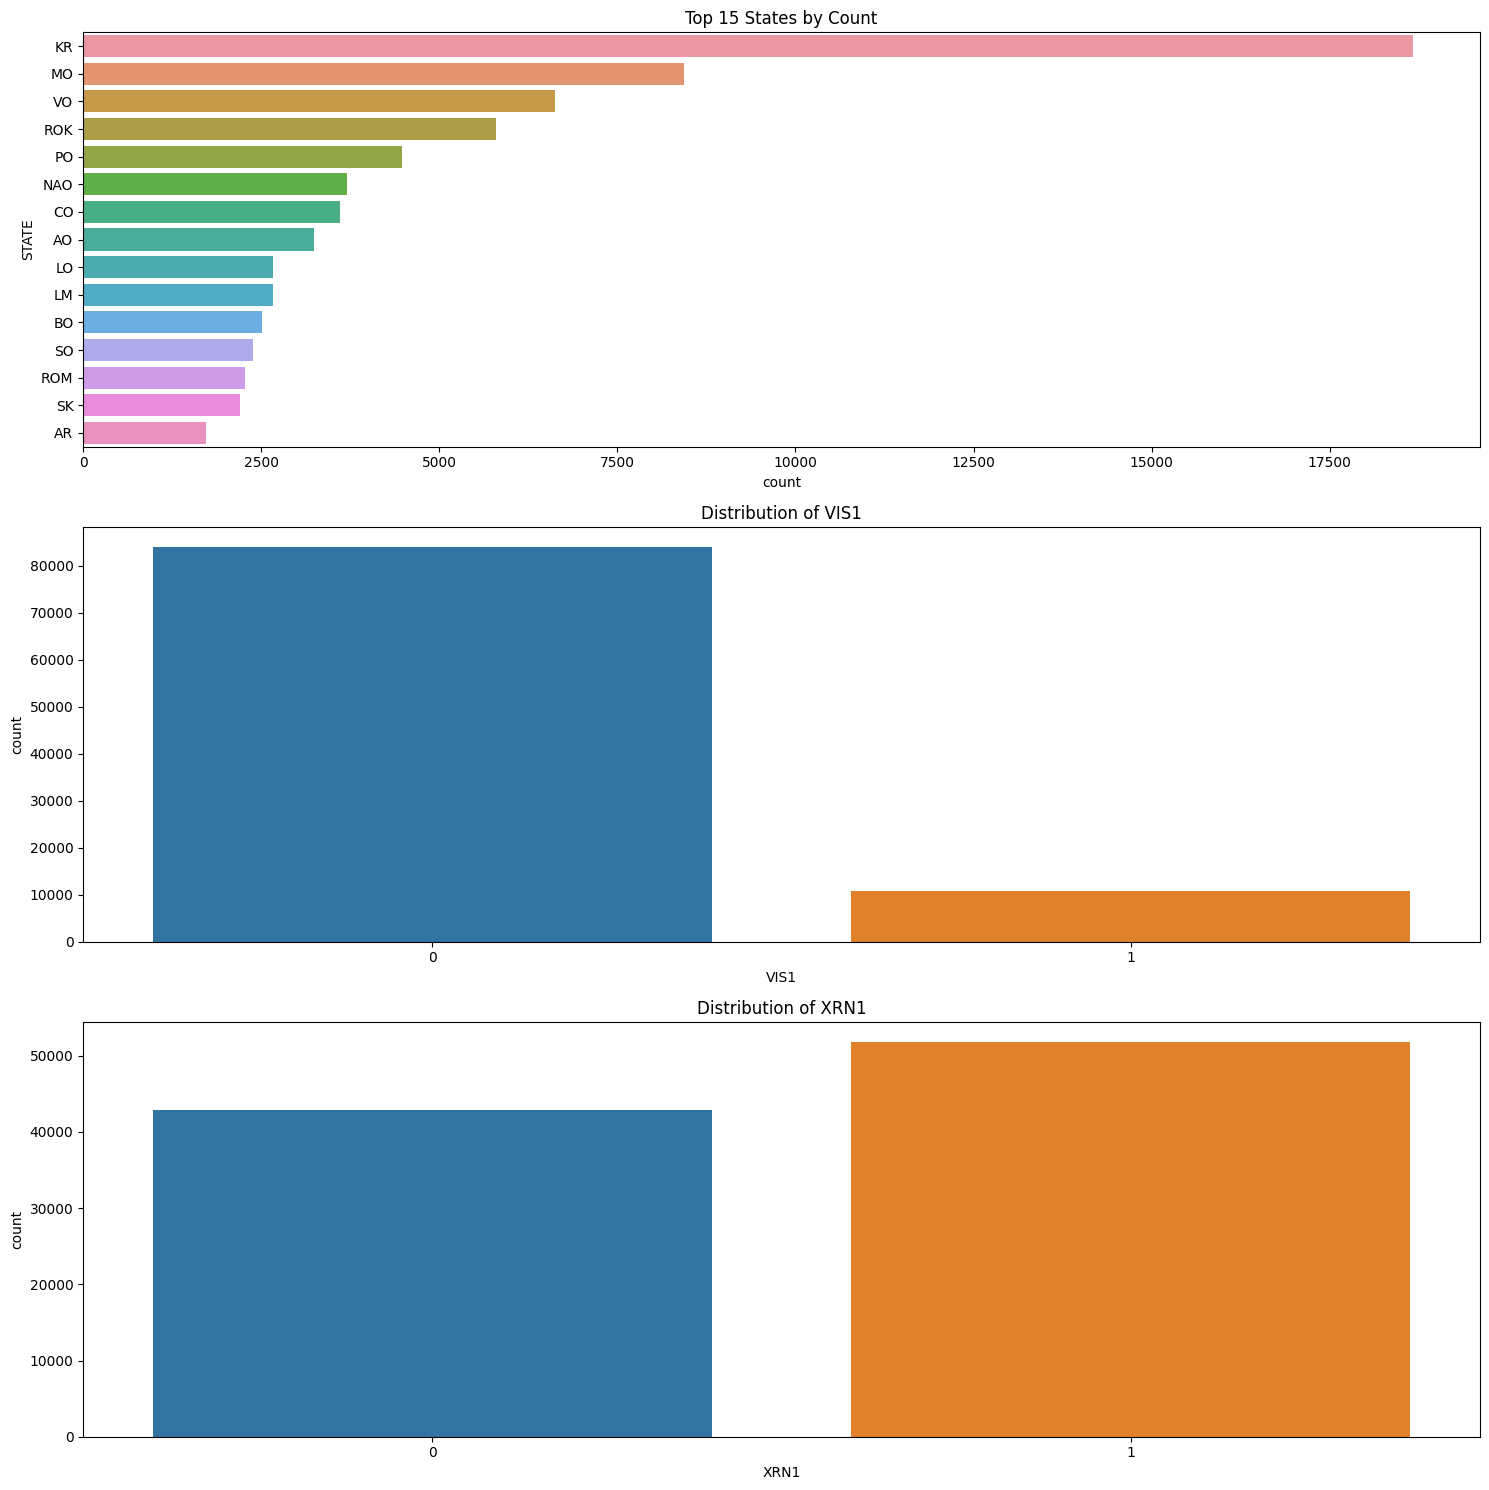

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))
sns.countplot(data=df, y='STATE', order=df['STATE'].value_counts().iloc[:15].index, ax=axes[0])
axes[0].set_title('Top 15 States by Count')
sns.countplot(data=df, x='VIS1', ax=axes[1])
axes[1].set_title('Distribution of VIS1')
sns.countplot(data=df, x='XRN1', ax=axes[2])
axes[2].set_title('Distribution of XRN1')
plt.tight_layout()
plt.show()

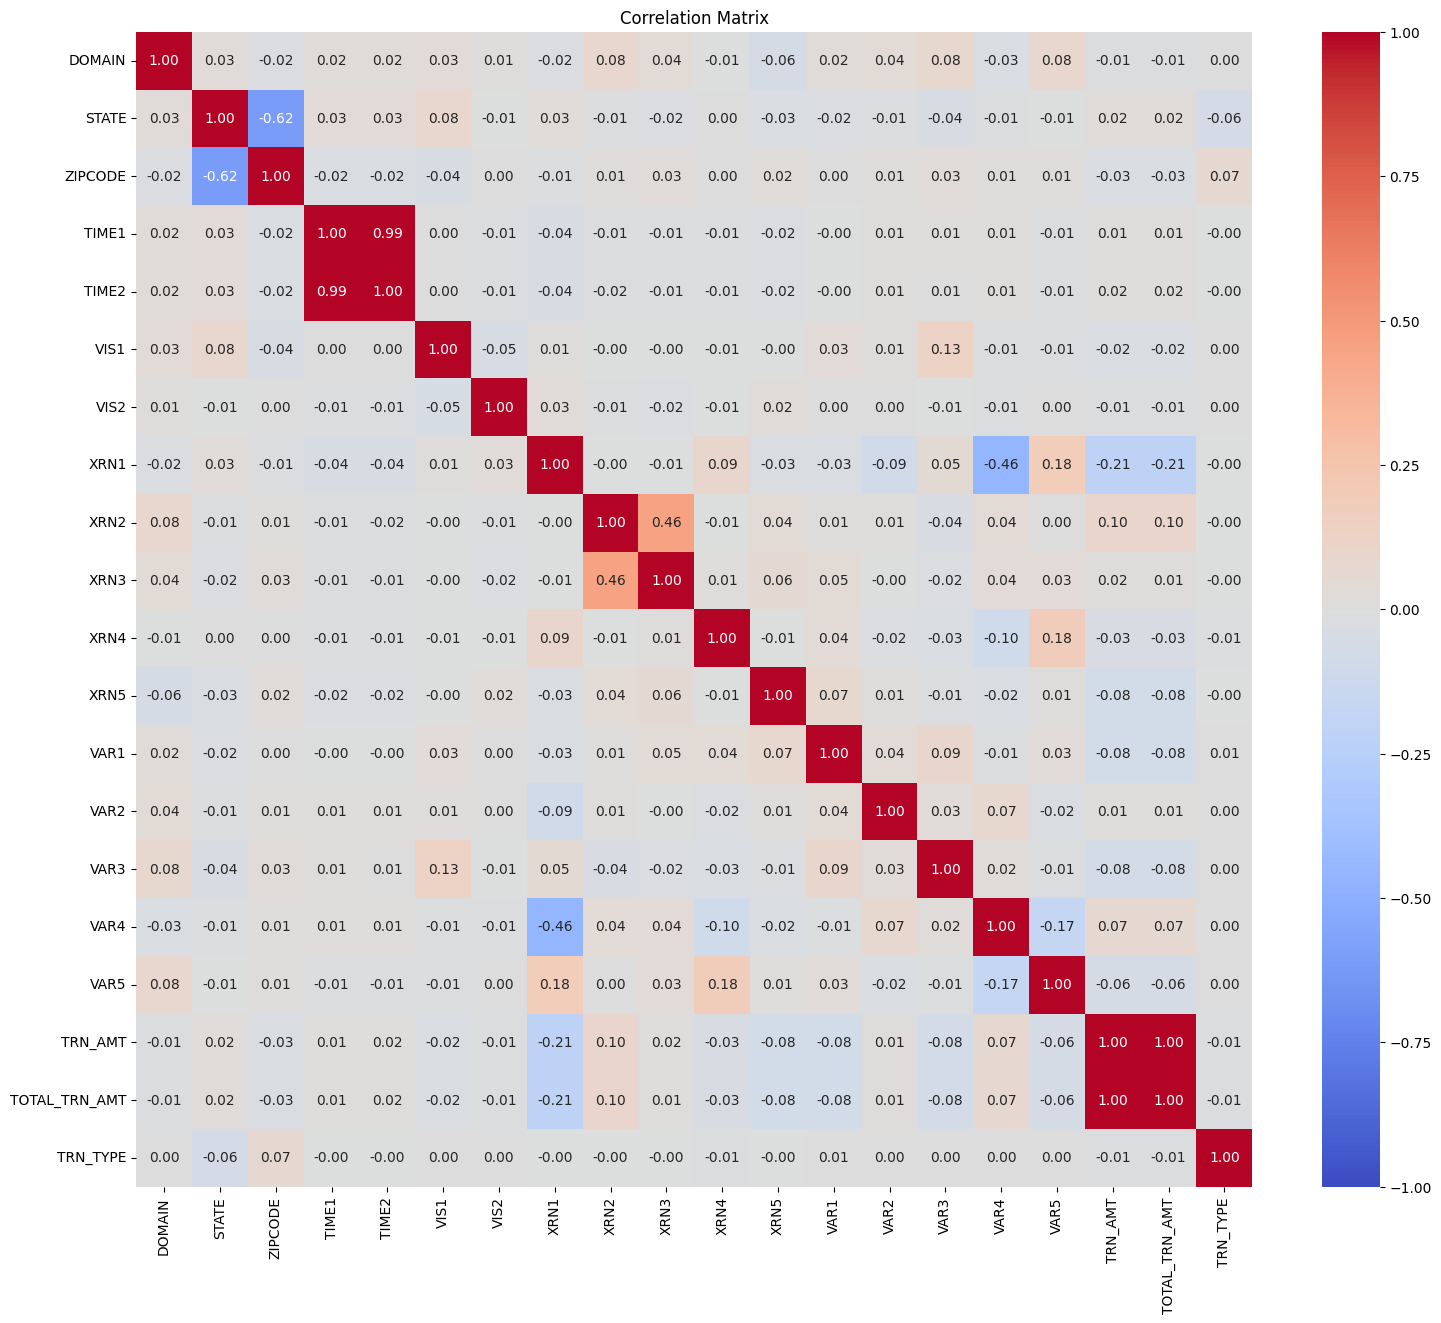

In [43]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
"""df_majority = df[df.TRN_TYPE == 'LEGIT']
df_minority = df[df.TRN_TYPE == 'FRAUD']

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)
df_balanced = pd.concat([df_majority_downsampled, df_minority])
df_balanced.TRN_TYPE.value_counts()"""

LEGIT    2094
FRAUD    2094
Name: TRN_TYPE, dtype: int64

In [21]:
"""df_balanced['TRN_TYPE'] = df_balanced['TRN_TYPE'].map({'LEGIT': 0, 'FRAUD': 1})
df_balanced.head()"""

"df_balanced['TRN_TYPE'] = df_balanced['TRN_TYPE'].map({'LEGIT': 0, 'FRAUD': 1})\ndf_balanced.head()"

In [14]:
df['TRN_TYPE'] = df['TRN_TYPE'].map({'LEGIT': 0, 'FRAUD': 1})
df.head()

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,0
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,0
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,0
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,0
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,0


In [ ]:
#df_balanced = df_balanced.reset_index(drop=True)

In [15]:
df.columns

Index(['DOMAIN', 'STATE', 'ZIPCODE', 'TIME1', 'TIME2', 'VIS1', 'VIS2', 'XRN1',
       'XRN2', 'XRN3', 'XRN4', 'XRN5', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5',
       'TRN_AMT', 'TOTAL_TRN_AMT', 'TRN_TYPE'],
      dtype='object')

In [17]:
domain_freq = df['DOMAIN'].value_counts().to_dict()
df['DOMAIN'] = df['DOMAIN'].map(domain_freq)
state_freq = df['STATE'].value_counts().to_dict()
df['STATE'] = df['STATE'].map(state_freq)
df.head()

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,3322,3236,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,0
1,3918,312,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,0
2,15814,635,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,0
3,16451,18676,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,0
4,11544,4479,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,0


In [34]:
df.shape

(94682, 20)

In [19]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and temporary sets with stratification
X = df.drop('TRN_TYPE', axis=1)
y = df['TRN_TYPE']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Splitting the temporary set into validation and test sets with stratification
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

X_train.shape, X_val.shape, X_test.shape



((66277, 19), (14202, 19), (14203, 19))

In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training set
scaler.fit(X_train)

# Transform the datasets
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]  # Display the first 5 rows of the scaled training data for inspection


array([[ 1.16347372,  1.88486   , -1.51735735,  0.97294958,  0.97179317,
        -0.35758856, -0.13665466, -1.09965146, -1.08358522, -0.81925072,
        -0.14188967, -0.05086699,  1.57378735, -0.86045106,  1.62540871,
        -1.07039123,  0.25640332, -1.80529804, -1.80371172],
       [-1.10563048, -0.86815894,  0.74972455,  0.59405769,  0.59249246,
        -0.35758856, -0.13665466,  0.90937905,  0.92286235,  1.22062755,
         7.04772937, -0.03167785,  0.57790333, -0.86045106, -0.17712473,
        -1.22384772, -0.56737111, -1.07548429, -1.0742847 ],
       [-0.32352979,  0.01276364,  0.64468601,  1.54128742,  1.54074423,
        -0.35758856, -0.13665466, -1.09965146, -1.08358522, -0.81925072,
        -0.14188967, -0.05086699,  1.57378735,  1.16218114,  0.7921114 ,
         1.07799957, -0.56737111,  2.3791553 ,  2.37852429],
       [-0.72372   ,  1.88486   , -1.44733165,  0.2151658 ,  0.21319176,
        -0.35758856, -0.13665466,  0.90937905, -1.08358522, -0.81925072,
        -0.141

In [40]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
clf = IsolationForest(n_estimators=10, contamination=0.05, random_state=42)

# Train the model
clf.fit(X_train_scaled)

# Predict anomalies on the validation set
val_predictions = clf.predict(X_val_scaled)

# Convert the predicted values: -1 (anomaly) to 1 (fraud) and 1 (inlier) to 0 (legit)
val_predictions = [1 if i == -1 else 0 for i in val_predictions]

val_predictions[:20]  # Display the first 10 predictions for inspection


[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix for the validation set
conf_matrix = confusion_matrix(y_val, val_predictions)

# Generate a classification report for the validation set
class_report = classification_report(y_val, val_predictions)

conf_matrix, class_report



(array([[13211,   677],
        [  306,     8]]),
 '              precision    recall  f1-score   support\n\n           0       0.98      0.95      0.96     13888\n           1       0.01      0.03      0.02       314\n\n    accuracy                           0.93     14202\n   macro avg       0.49      0.49      0.49     14202\nweighted avg       0.96      0.93      0.94     14202\n')

Epoch 1/20
130/130 [==============================] - 8s 6ms/step - loss: 0.1178 - mse: 1.0835 - val_loss: 0.0881 - val_mse: 0.9505
Epoch 2/20
130/130 [==============================] - 1s 5ms/step - loss: 0.0885 - mse: 0.9475 - val_loss: 0.0745 - val_mse: 0.8895
Epoch 3/20
130/130 [==============================] - 1s 5ms/step - loss: 0.0791 - mse: 0.8996 - val_loss: 0.0640 - val_mse: 0.8322
Epoch 4/20
130/130 [==============================] - 1s 5ms/step - loss: 0.0725 - mse: 0.8648 - val_loss: 0.0581 - val_mse: 0.8056
Epoch 5/20
130/130 [==============================] - 1s 5ms/step - loss: 0.0684 - mse: 0.8453 - val_loss: 0.0547 - val_mse: 0.7900
Epoch 6/20
130/130 [==============================] - 1s 4ms/step - loss: 0.0655 - mse: 0.8316 - val_loss: 0.0527 - val_mse: 0.7806
Epoch 7/20
130/130 [==============================] - 1s 4ms/step - loss: 0.0637 - mse: 0.8233 - val_loss: 0.0509 - val_mse: 0.7705
Epoch 8/20
130/130 [==============================] - 1s 5ms/step - loss: 0.

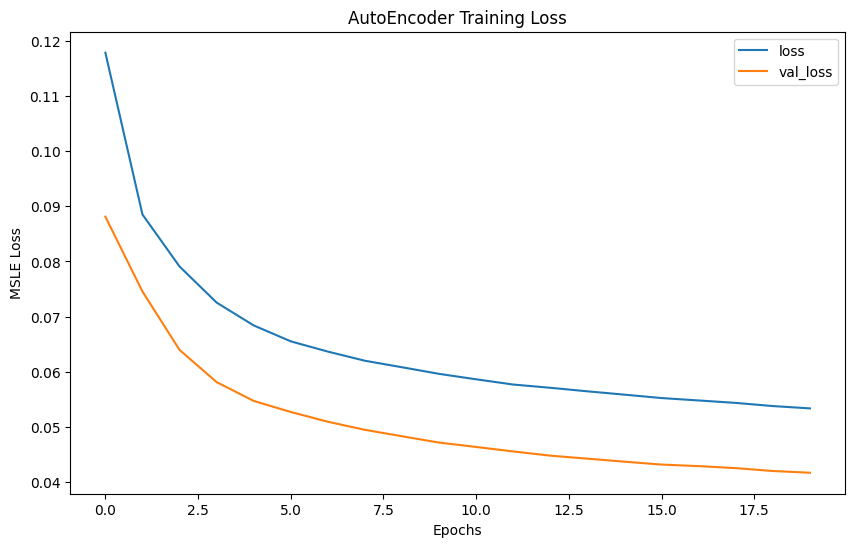

In [27]:

# create a model by subclassing Model class in tensorflow
class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units

  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])

  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

# Create and compile the model
model = AutoEncoder(output_units=X_train_scaled.shape[1])
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

# Train the model
history = model.fit(
    X_train_scaled,
    X_train_scaled,
    epochs=20,
    batch_size=512,
    validation_data=(X_test_scaled, X_test_scaled),
    verbose=1
)

# Plotting the loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.title('AutoEncoder Training Loss')
plt.show()


In [28]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)

  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def find_threshold_method_two(model, x_train_scaled):
  # another method to find threshold
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)

  threshold_2 = np.percentile(reconstruction_errors, 95)
  return threshold_2

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  # 0 = anomaly, 1 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds

In [30]:
threshold = find_threshold(model, X_train_scaled)
print(f"Threshold method one: {threshold}")

threshold_2 = find_threshold_method_two(model, X_train_scaled)
print(f"Threshold method two: {threshold_2}")

2072/2072 [==============================] - 3s 1ms/step
Threshold method one: 0.08283382950915259
2072/2072 [==============================] - 3s 1ms/step
Threshold method two: 0.09828715414473854


In [31]:
preds = get_predictions(model, X_test_scaled, threshold)
accuracy_score(preds, y_test)

444/444 [==============================] - 1s 1ms/step


0.0844187847637823

In [38]:
import kerastuner as kt

class AutoEncoderTuner(Model):

  def __init__(self, hp, output_units, code_size=8):
    super().__init__()
    dense_1_units = hp.Int('dense_1_units', min_value=16, max_value=72, step=4)
    dense_2_units = hp.Int('dense_2_units', min_value=16, max_value=72, step=4)
    dense_3_units = hp.Int('dense_3_units', min_value=16, max_value=72, step=4)
    dense_4_units = hp.Int('dense_4_units', min_value=16, max_value=72, step=4)
    dense_5_units = hp.Int('dense_5_units', min_value=16, max_value=72, step=4)
    dense_6_units = hp.Int('dense_6_units', min_value=16, max_value=72, step=4)

    self.encoder = Sequential([
      Dense(dense_1_units, activation='relu'),
      Dropout(0.1),
      Dense(dense_2_units, activation='relu'),
      Dropout(0.1),
      Dense(dense_3_units, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(dense_4_units, activation='relu'),
      Dropout(0.1),
      Dense(dense_5_units, activation='relu'),
      Dropout(0.1),
      Dense(dense_6_units, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])

  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded


def build_model(hp):
  model = AutoEncoderTuner(hp, 19)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(
      loss='msle',
      optimizer=Adam(learning_rate=hp_learning_rate),
  )
  return model

In [39]:
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=20,
    factor=3,
    directory='autoencoder',
    project_name='tuning_autoencoder6'
)

tuner.search(
    X_train_scaled,
    X_train_scaled,
    epochs=20,
    batch_size=512,
    validation_data=(X_test_scaled, X_test_scaled))

Trial 26 Complete [00h 00m 16s]
val_loss: 0.03247082233428955

Best val_loss So Far: 0.03247082233428955
Total elapsed time: 00h 03m 20s
